# Adding Dependences

In [1]:
using DelimitedFiles
using Images
using Plots

# Extract Matrix From Image

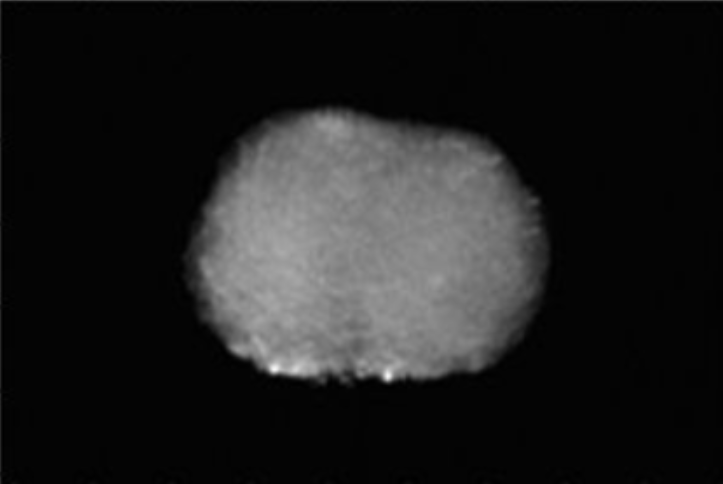

In [2]:
img = load("B.png")

## Extracting the grayscale on the image

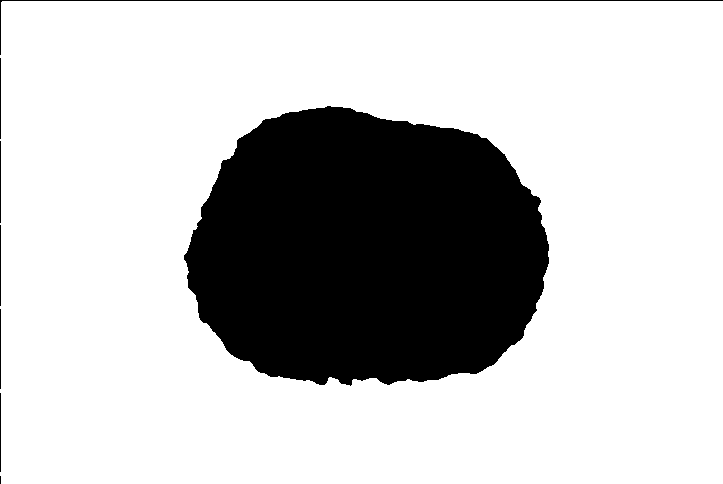

In [3]:
img_channel = Gray.(.!(Gray.(img) .> 0.1))
# img_channel =Gray.(Gray_img)

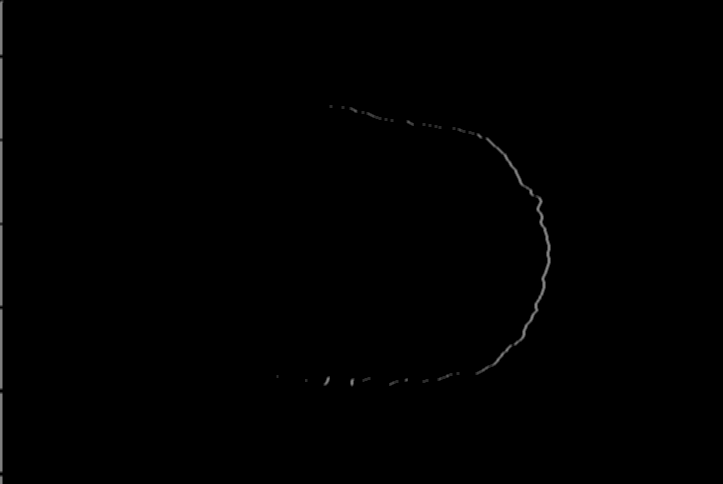

In [4]:
krnl_h = centered(Gray{Float32}[0 -1 -1 -1 0; 0 -1 -1 -1 0; 0 0 0 0 0; 0 1 1 1 0; 0 1 1 1 0]./12)
grad_h = imfilter(img_channel, krnl_h')

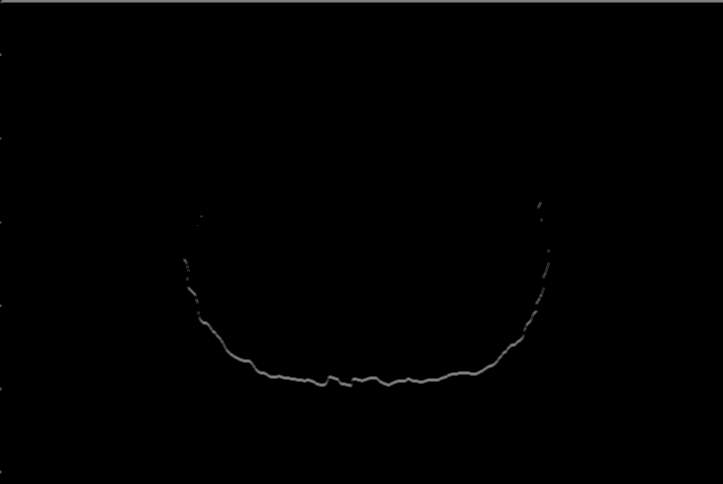

In [5]:
krnl_v = centered(Gray{Float32}[0 0 0 0 0; -1 -1 0 1 1;-1 -1 0 1 1;-1 -1 0 1 1;0 0 0 0 0 ]./12)
grad_v = imfilter(img_channel, krnl_v')

# Extracting the Contour on the image

In [7]:
# reduce = 10
# Gray_img_contour = abs.(Gray_img - circshift(Gray_img,2))
# Gray_img_contour = Gray_img_contour[reduce:size(Gray_img_contour)[1]-reduce,:]
# Gray.(Gray_img_contour)

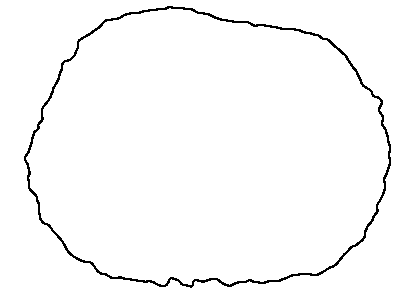

In [11]:
reduce = [100,90,160,160] # [up,down,left,right]
final_img = (grad_h.^2) .+ (grad_v.^2)
final_img = Gray.(.!(Gray.(final_img) .> 0.1))
final_img = final_img[reduce[1]:size(final_img)[1]-reduce[2],reduce[3]:size(final_img)[2]-reduce[4]]

# Extracting the index of each point

In [96]:
# idx = CartesianIndices(size(Gray_img_contour))[Gray_img_contour .== 1]
# arr_idx = hcat(getindex.(idx,2),getindex.(idx,1))

In [12]:
idx = CartesianIndices(size(final_img))[final_img .== 0]
arr_idx = hcat(getindex.(idx,2),getindex.(idx,1))

2576×2 Matrix{Int64}:
  25  157
  25  158
  25  159
  25  160
  25  161
  26  155
  26  156
  26  157
  26  158
  26  159
   ⋮  
 391  158
 391  159
 391  160
 391  161
 391  162
 391  163
 391  164
 391  165
 391  166

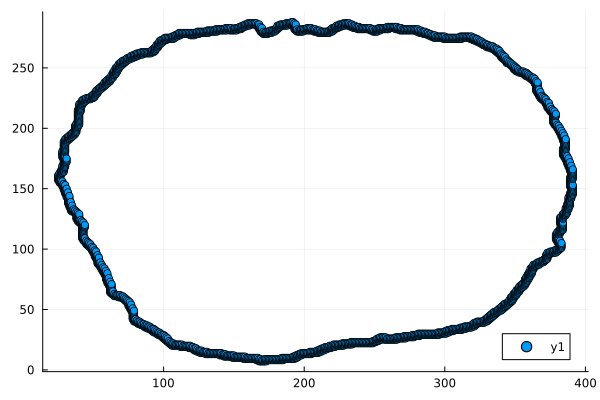

In [13]:
plot(arr_idx[:,1], arr_idx[:,2], seriestype = :scatter)

# Center of Mass

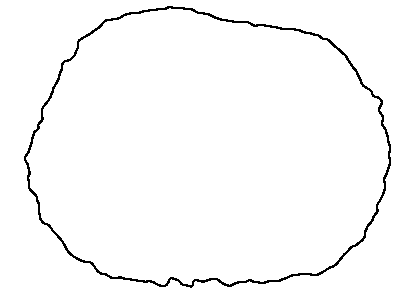

In [14]:
final_img

In [15]:
center_of_mass = sum(arr_idx, dims=1)/size(arr_idx,1)

1×2 Matrix{Float64}:
 208.446  153.894

# Putting the index in the center of mass

In [16]:
center_idx = arr_idx - repeat(center_of_mass, size(arr_idx, 1))

2576×2 Matrix{Float64}:
 -183.446   3.10559
 -183.446   4.10559
 -183.446   5.10559
 -183.446   6.10559
 -183.446   7.10559
 -182.446   1.10559
 -182.446   2.10559
 -182.446   3.10559
 -182.446   4.10559
 -182.446   5.10559
    ⋮      
  182.554   4.10559
  182.554   5.10559
  182.554   6.10559
  182.554   7.10559
  182.554   8.10559
  182.554   9.10559
  182.554  10.1056
  182.554  11.1056
  182.554  12.1056

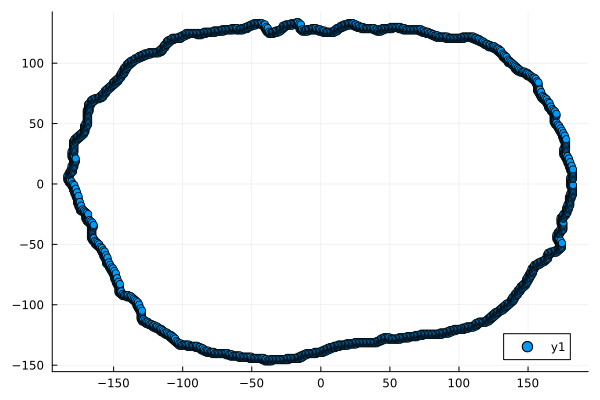

In [17]:
plot(center_idx[:,1], center_idx[:,2], seriestype = :scatter)

## Cilindrical Coordinates

In [18]:
r = sqrt.(sum(center_idx .^ 2, dims=2))
θ = 180/pi .* (atan.(center_idx[:,2] ./ center_idx[:,1]) + pi*[center_idx[:,2] .< 0][1]) .+ 90
center_idx_cil_coord = hcat(θ,r)

2576×2 Matrix{Float64}:
 89.0301  183.473
 88.7179  183.492
 88.4058  183.517
 88.0937  183.548
 87.7818  183.584
 89.6528  182.45
 89.3388  182.459
 89.0248  182.473
 88.7109  182.493
 88.3971  182.518
  ⋮       
 91.2884  182.6
 91.602   182.625
 91.9156  182.656
 92.229   182.692
 92.5423  182.733
 92.8555  182.781
 93.1685  182.833
 93.4813  182.891
 93.7939  182.955

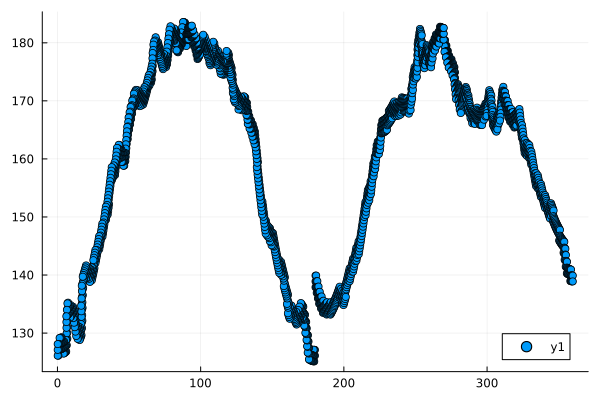

In [19]:
plot(center_idx_cil_coord[:,1], center_idx_cil_coord[:,2], seriestype = :scatter)

In [20]:
findmin(center_idx_cil_coord[:,1])

(0.19966630216656256, 1301)

In [21]:
findmax(center_idx_cil_coord[:,1])

(359.81715934052374, 1297)